# Diccionario de campos
* Make	Marca del vehículo
* Model	Modelo del vehículo
* Price USD	Precio del vehículo en dólares estadounidenses
* Year_a	Año de fabricación del vehículo
* sale	Fecha de venta del vehículo
* Kilometer	Kilometraje del vehículo
* Fuel Type	Tipo de combustible del vehículo
* Transmission	Transmisión del vehículo
* Color	Color del vehículo
* Owner_a	Propietario anterior del vehículo
* Seller Type	Tipo de vendedor del vehículo
* Engine	Motor del vehículo
* Max Power	Potencia máxima del vehículo
* Max Torque	Par máximo del vehículo
* Drivetrain	Sistema de tracción del vehículo
* Length_a	Longitud del vehículo
* Width	Anchura del vehículo
* Height	Altura del vehículo
* Seating Capacity	Capacidad de asientos del vehículo
* Fuel Tank Capacity	Capacidad de fulleado en Galones

In [1]:
#Importar las librerias para este analisis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#Para escarlar datos utilizando una tabla Z estadistica
from sklearn.preprocessing import StandardScaler

#Para realizar el analisis de reduccion de dimensionalidad
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

#Quitar los warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Cargar los datos
data = pd.read_csv("Depuracion_Auto_Tech1.csv")

In [3]:
data.head()

,Make,Model,sale,Fuel Type,Transmission,Color,Owner_a,Seller Type,Engine_a,Max Power,Max Torque,Drivetrain,Price USD,Kilometer,Length_a,Width,Height,Seating Capacity,Fuel Tank Capacity,Year_a
0,Honda,Amaze 1.2 VX i-VTEC,12/12/2019,Gasolina,Manual,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,6060.0,87150,3990.0,1680.0,1505.0,5.0,9.240,2017
1,Maruti Suzuki,Swift DZire VDI,9/10/2022,Diesel,Manual,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,5400.0,75000,3995.0,1695.0,1555.0,5.0,11.088,2014
2,Toyota,Glanza G,1/23/2021,Gasolina,Manual,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,9588.0,37500,3995.0,1745.0,1510.0,5.0,9.768,2019
3,Toyota,Innova 2.4 VX 7 STR [2016-2020],11/23/2019,Diesel,Manual,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,23400.0,69000,4735.0,1830.0,1795.0,7.0,14.520,2018
4,Maruti Suzuki,Ciaz ZXi,5/1/2018,Gasolina,Manual,Grey,First,Individual,1373 cc,91 bhp @ 6000 rpm,130 Nm @ 4000 rpm,FWD,8100.0,73315,4490.0,1730.0,1485.0,5.0,11.352,2017


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1621 entries, 0 to 1620
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                1621 non-null   object 
 1   Model               1621 non-null   object 
 2   sale                1621 non-null   object 
 3   Fuel Type           1621 non-null   object 
 4   Transmission        1621 non-null   object 
 5   Color               1621 non-null   object 
 6   Owner_a             1621 non-null   object 
 7   Seller Type         1621 non-null   object 
 8   Engine_a            1595 non-null   object 
 9   Max Power           1595 non-null   object 
 10  Max Torque          1595 non-null   object 
 11  Drivetrain          1587 non-null   object 
 12  Price USD           1621 non-null   float64
 13  Kilometer           1621 non-null   int64  
 14  Length_a            1604 non-null   float64
 15  Width               1604 non-null   float64
 16  Height

In [5]:
# borrando valores NAN
data.dropna (how="all")

,Make,Model,sale,Fuel Type,Transmission,Color,Owner_a,Seller Type,Engine_a,Max Power,Max Torque,Drivetrain,Price USD,Kilometer,Length_a,Width,Height,Seating Capacity,Fuel Tank Capacity,Year_a
0,Honda,Amaze 1.2 VX i-VTEC,12/12/2019,Gasolina,Manual,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,6060.0,87150,3990.0,1680.0,1505.0,5.0,9.240,2017
1,Maruti Suzuki,Swift DZire VDI,9/10/2022,Diesel,Manual,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,5400.0,75000,3995.0,1695.0,1555.0,5.0,11.088,2014
2,Toyota,Glanza G,1/23/2021,Gasolina,Manual,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,9588.0,37500,3995.0,1745.0,1510.0,5.0,9.768,2019
3,Toyota,Innova 2.4 VX 7 STR [2016-2020],11/23/2019,Diesel,Manual,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,23400.0,69000,4735.0,1830.0,1795.0,7.0,14.520,2018
4,Maruti Suzuki,Ciaz ZXi,5/1/2018,Gasolina,Manual,Grey,First,Individual,1373 cc,91 bhp @ 6000 rpm,130 Nm @ 4000 rpm,FWD,8100.0,73315,4490.0,1730.0,1485.0,5.0,11.352,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1616,Maruti Suzuki,Ritz Vxi (ABS) BS-IV,11/7/2022,Gasolina,Manual,White,Second,Individual,1197 cc,85 bhp @ 6000 rpm,113 Nm @ 4500 rpm,FWD,2940.0,79000,3775.0,1680.0,1620.0,5.0,11.352,2014
1617,Mahindra,XUV500 W8 [2015-2017],1/16/2023,Diesel,Manual,White,First,Individual,2179 cc,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,FWD,10200.0,90300,4585.0,1890.0,1785.0,7.0,18.480,2016
1618,Hyundai,Eon D-Lite +,7/19/2018,Gasolina,Manual,White,Second,Individual,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3300.0,83000,3495.0,1550.0,1500.0,5.0,8.448,2014
1619,BMW,5-Series 520d Luxury Line [2017-2019],1/18/2023,Diesel,Automatic,White,First,Individual,1995 cc,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,RWD,51480.0,60474,4936.0,1868.0,1479.0,5.0,17.160,2018


In [6]:
#rellenando valores NAN
data.fillna(0)

,Make,Model,sale,Fuel Type,Transmission,Color,Owner_a,Seller Type,Engine_a,Max Power,Max Torque,Drivetrain,Price USD,Kilometer,Length_a,Width,Height,Seating Capacity,Fuel Tank Capacity,Year_a
0,Honda,Amaze 1.2 VX i-VTEC,12/12/2019,Gasolina,Manual,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,6060.0,87150,3990.0,1680.0,1505.0,5.0,9.240,2017
1,Maruti Suzuki,Swift DZire VDI,9/10/2022,Diesel,Manual,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,5400.0,75000,3995.0,1695.0,1555.0,5.0,11.088,2014
2,Toyota,Glanza G,1/23/2021,Gasolina,Manual,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,9588.0,37500,3995.0,1745.0,1510.0,5.0,9.768,2019
3,Toyota,Innova 2.4 VX 7 STR [2016-2020],11/23/2019,Diesel,Manual,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,23400.0,69000,4735.0,1830.0,1795.0,7.0,14.520,2018
4,Maruti Suzuki,Ciaz ZXi,5/1/2018,Gasolina,Manual,Grey,First,Individual,1373 cc,91 bhp @ 6000 rpm,130 Nm @ 4000 rpm,FWD,8100.0,73315,4490.0,1730.0,1485.0,5.0,11.352,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1616,Maruti Suzuki,Ritz Vxi (ABS) BS-IV,11/7/2022,Gasolina,Manual,White,Second,Individual,1197 cc,85 bhp @ 6000 rpm,113 Nm @ 4500 rpm,FWD,2940.0,79000,3775.0,1680.0,1620.0,5.0,11.352,2014
1617,Mahindra,XUV500 W8 [2015-2017],1/16/2023,Diesel,Manual,White,First,Individual,2179 cc,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,FWD,10200.0,90300,4585.0,1890.0,1785.0,7.0,18.480,2016
1618,Hyundai,Eon D-Lite +,7/19/2018,Gasolina,Manual,White,Second,Individual,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3300.0,83000,3495.0,1550.0,1500.0,5.0,8.448,2014
1619,BMW,5-Series 520d Luxury Line [2017-2019],1/18/2023,Diesel,Automatic,White,First,Individual,1995 cc,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,RWD,51480.0,60474,4936.0,1868.0,1479.0,5.0,17.160,2018


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1621 entries, 0 to 1620
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                1621 non-null   object 
 1   Model               1621 non-null   object 
 2   sale                1621 non-null   object 
 3   Fuel Type           1621 non-null   object 
 4   Transmission        1621 non-null   object 
 5   Color               1621 non-null   object 
 6   Owner_a             1621 non-null   object 
 7   Seller Type         1621 non-null   object 
 8   Engine_a            1595 non-null   object 
 9   Max Power           1595 non-null   object 
 10  Max Torque          1595 non-null   object 
 11  Drivetrain          1587 non-null   object 
 12  Price USD           1621 non-null   float64
 13  Kilometer           1621 non-null   int64  
 14  Length_a            1604 non-null   float64
 15  Width               1604 non-null   float64
 16  Height

In [8]:
#Regresion lineal (paso 1)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Suponiendo que 'data' es tu DataFrame original
# Seleccionamos las características relevantes para el modelo
selected_features = ['Year_a', 'Kilometer', 'Fuel Type', 'Transmission', 'Price USD']

# Eliminamos filas con datos faltantes en las características seleccionadas
data_processed = data[selected_features].dropna()

# Convertimos variables categóricas en variables dummy
data_processed = pd.get_dummies(data_processed, columns=['Fuel Type', 'Transmission'])

# Dividimos los datos en características (X) y etiquetas (y)
X = data_processed.drop(columns=['Price USD'])
y = data_processed['Price USD']

# Estandarizamos los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Creamos y entrenamos el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluamos el modelo en el conjunto de prueba
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (Regresión Lineal):", mse)

Mean Squared Error (Regresión Lineal): 997180991.3154056


In [9]:
#modelo PCA

from sklearn.decomposition import PCA

# Aplicamos PCA para reducir la dimensionalidad
pca = PCA(n_components=2)  # Reducimos la dimensionalidad a 2 componentes principales
X_pca = pca.fit_transform(X_scaled)

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Creamos y entrenamos el modelo de regresión lineal con los datos de PCA
model_pca = LinearRegression()
model_pca.fit(X_train_pca, y_train_pca)

# Evaluamos el modelo en el conjunto de prueba
y_pred_pca = model_pca.predict(X_test_pca)
mse_pca = mean_squared_error(y_test_pca, y_pred_pca)
print("Mean Squared Error (PCA):", mse_pca)

Mean Squared Error (PCA): 1028817014.1674166


In [10]:
# modelo TSNE

from sklearn.manifold import TSNE

# Aplicamos t-SNE para reducir la dimensionalidad
tsne = TSNE(n_components=2, random_state=42)  # Reducimos la dimensionalidad a 2 componentes
X_tsne = tsne.fit_transform(X_scaled)

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train_tsne, X_test_tsne, y_train_tsne, y_test_tsne = train_test_split(X_tsne, y, test_size=0.2, random_state=42)

# Creamos y entrenamos el modelo de regresión lineal con los datos de t-SNE
model_tsne = LinearRegression()
model_tsne.fit(X_train_tsne, y_train_tsne)

# Evaluamos el modelo en el conjunto de prueba
y_pred_tsne = model_tsne.predict(X_test_tsne)
mse_tsne = mean_squared_error(y_test_tsne, y_pred_tsne)
print("Mean Squared Error (t-SNE):", mse_tsne)

Mean Squared Error (t-SNE): 1012866111.2102019


# Observaciones
* Al realizar la comprativa entre modelos se verifica que TSNE tiene el menor error medio cuadrado, por lo que trabajaremos con ese modelo


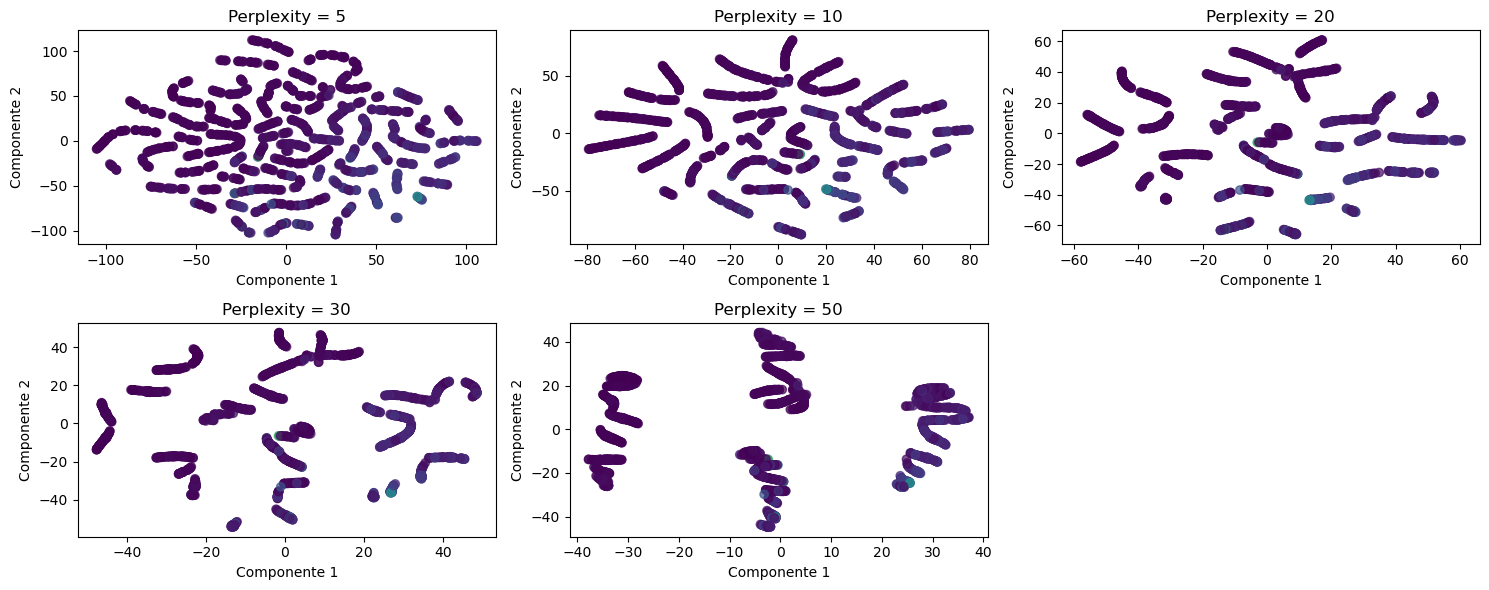

In [11]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Valores de perplexity a probar
perplexities = [5, 10, 20, 30, 50]

plt.figure(figsize=(15, 6))

for i, perplexity in enumerate(perplexities, 1):
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    X_tsne = tsne.fit_transform(X_scaled)
    
    plt.subplot(2, 3, i)
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', alpha=0.7)
    plt.title(f"Perplexity = {perplexity}")
    plt.xlabel('Componente 1')
    plt.ylabel('Componente 2')

plt.tight_layout()
plt.show()

# Observaciones
* El perplexity 50 muestra de forma mas marcada los grupos, en este caso 4 grupos

 

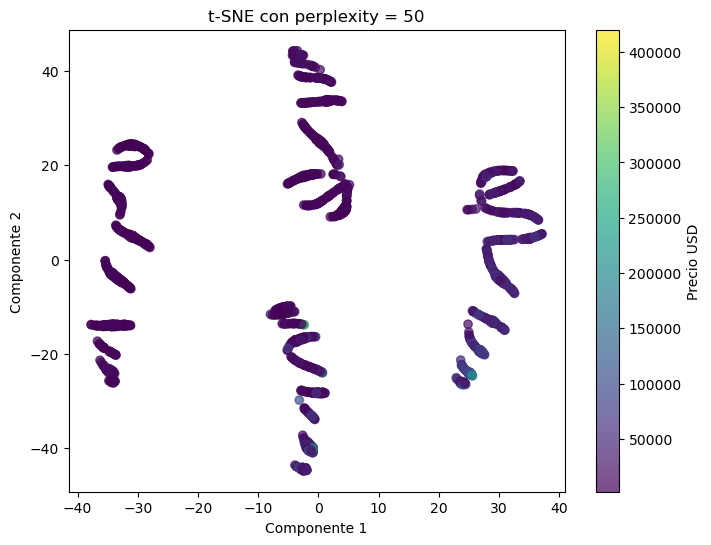

In [12]:
tsne = TSNE(n_components=2, perplexity=50, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Graficamos los resultados
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.title("t-SNE con perplexity = 50")
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.colorbar(label='Precio USD')
plt.show()

# Observacion:
* Este grafico hace referencia al modelo tsne basado en el precio USD

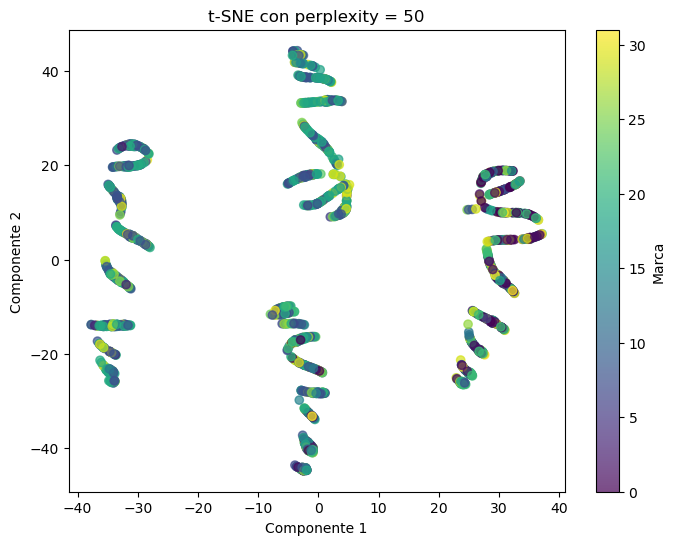

In [13]:
tsne = TSNE(n_components=2, perplexity=50, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Graficamos los resultados
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=data['Make'].astype('category').cat.codes, cmap='viridis', alpha=0.7)
plt.title("t-SNE con perplexity = 50")
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.colorbar(label='Marca')
plt.show()

# Observacion:
* Este grafico hace referencia al modelo tsne basado en el Marca.

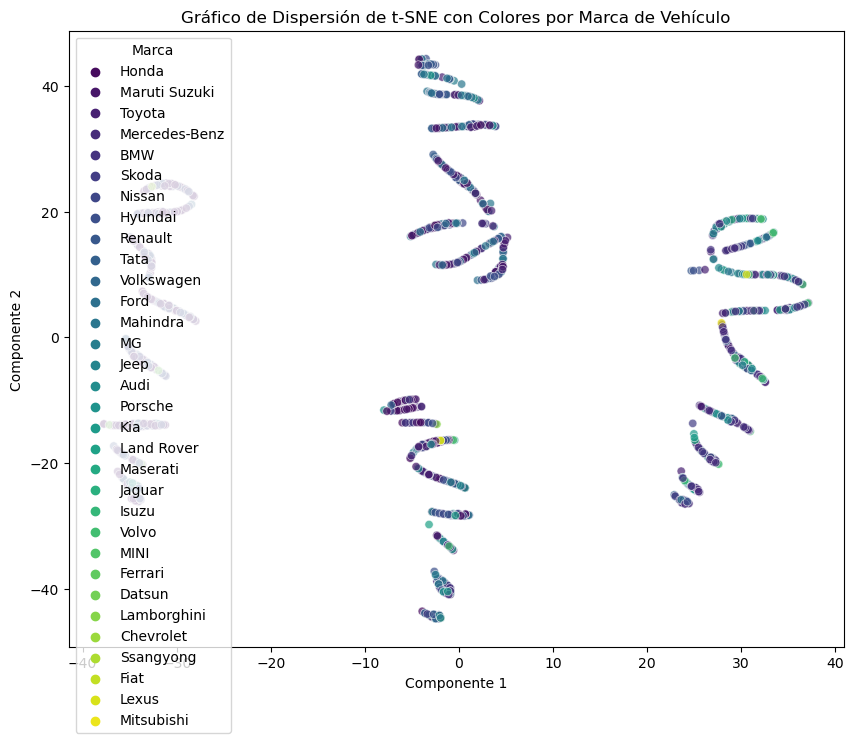

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

# Aplicamos t-SNE con perplexity=50
tsne = TSNE(n_components=2, perplexity=50, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Creamos un DataFrame con los resultados de t-SNE y la marca de vehículo
tsne_df = pd.DataFrame(data=X_tsne, columns=['Componente 1', 'Componente 2'])
tsne_df['Marca'] = data['Make']

# Creamos el gráfico de dispersión con colores según la marca de vehículo
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Componente 1', y='Componente 2', hue='Marca', data=tsne_df, palette='viridis', alpha=0.7)
plt.title('Gráfico de Dispersión de t-SNE con Colores por Marca de Vehículo')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.legend(title='Marca')
plt.show()

# Observaciones:
* el gráfico nos proporciona una visualización intuitiva de cómo se distribuyen las diferentes marcas de vehículos en el espacio de baja dimensión, lo que puede ayudar a comprender mejor la estructura y las relaciones entre los datos originales.

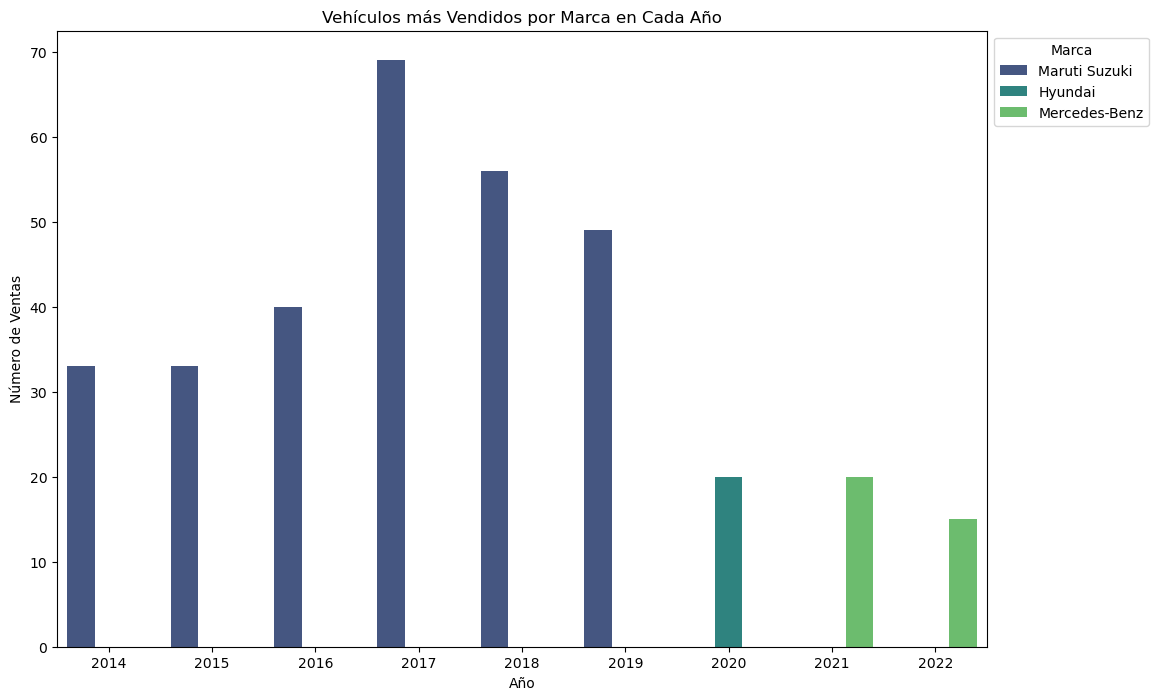

In [15]:
sales_by_year_make = data.groupby(['Year_a', 'Make']).size().reset_index(name='Sales')

# Obtenemos las marcas más vendidas para cada año
top_makes_by_year = sales_by_year_make.groupby('Year_a').apply(lambda x: x.nlargest(1, 'Sales')).reset_index(drop=True)

# Creamos el gráfico de barras mostrando los vehículos más vendidos por marca en cada año
plt.figure(figsize=(12, 8))
sns.barplot(data=top_makes_by_year, x='Year_a', y='Sales', hue='Make', palette='viridis')
plt.title('Vehículos más Vendidos por Marca en Cada Año')
plt.xlabel('Año')
plt.ylabel('Número de Ventas')
plt.legend(title='Marca', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

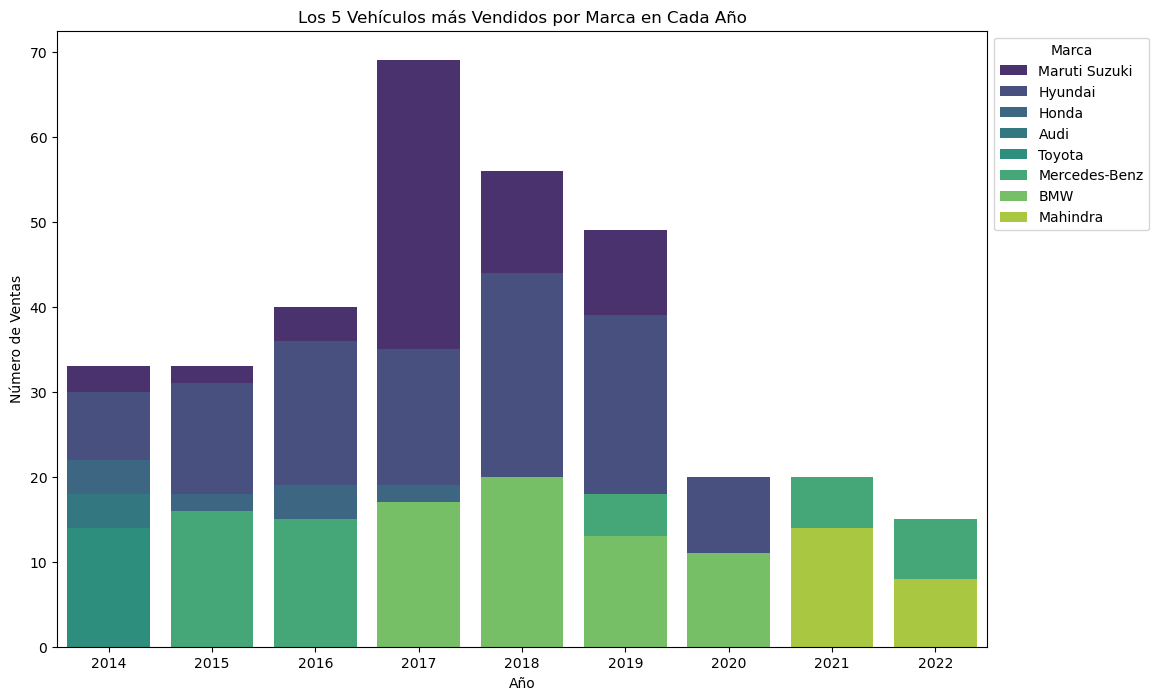

In [16]:
sales_by_year_make = data.groupby(['Year_a', 'Make']).size().reset_index(name='Sales')

# Obtenemos los 5 vehículos más vendidos para cada año
top_vehicles_by_year = sales_by_year_make.groupby('Year_a').apply(lambda x: x.nlargest(5, 'Sales')).reset_index(drop=True)

# Creamos el gráfico de barras mostrando los 5 vehículos más vendidos por marca en cada año
plt.figure(figsize=(12, 8))
sns.barplot(data=top_vehicles_by_year, x='Year_a', y='Sales', hue='Make', palette='viridis', dodge=False)
plt.title('Los 5 Vehículos más Vendidos por Marca en Cada Año')
plt.xlabel('Año')
plt.ylabel('Número de Ventas')
plt.legend(title='Marca', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

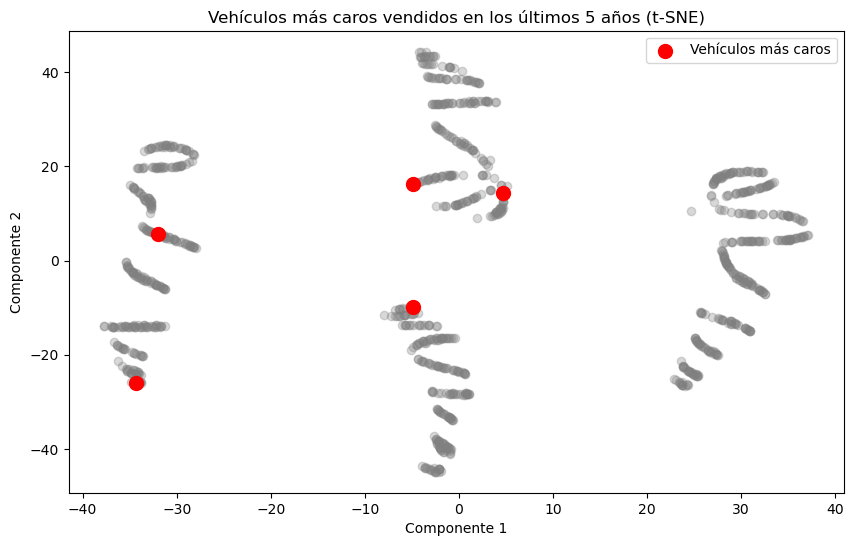

In [17]:
recent_data = data[data['Year_a'] >= data['Year_a'].max() - 5]

# Recuperamos los precios de los vehículos que están presentes en las coordenadas t-SNE
prices = recent_data['Price USD']

# Filtramos las coordenadas t-SNE para que coincidan con los vehículos presentes en los precios
X_tsne_filtered = X_tsne[:len(prices)]

# Escalamos los precios para tener en cuenta las diferencias de magnitud con las coordenadas t-SNE
scaled_prices = (prices - prices.min()) / (prices.max() - prices.min())

# Concatenamos las coordenadas t-SNE con los precios escalados
tsne_with_prices = np.column_stack((X_tsne_filtered, scaled_prices))

# Ordenamos los datos por el precio escalado
tsne_with_prices_sorted = tsne_with_prices[tsne_with_prices[:, 2].argsort()]

# Tomamos los 5 vehículos más caros
top_5_expensive = tsne_with_prices_sorted[-5:]

# Graficamos los resultados
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne_filtered[:, 0], X_tsne_filtered[:, 1], c='gray', alpha=0.3)
plt.scatter(top_5_expensive[:, 0], top_5_expensive[:, 1], c='red', label='Vehículos más caros', s=100)
plt.title('Vehículos más caros vendidos en los últimos 5 años (t-SNE)')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.legend()
plt.show()

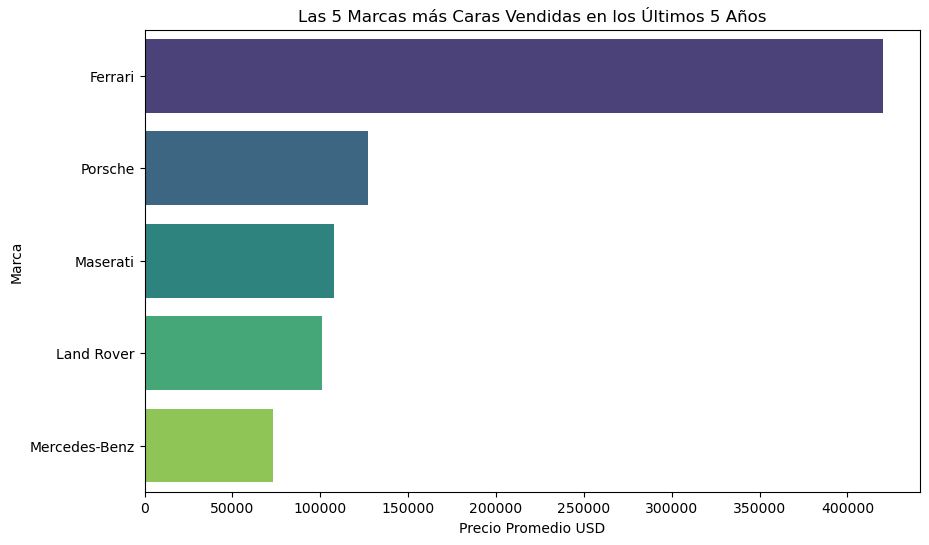

In [18]:
recent_data = data[data['Year_a'] >= data['Year_a'].max() - 5]

# Calculamos el precio promedio de venta para cada marca
mean_prices_by_make = recent_data.groupby('Make')['Price USD'].mean().reset_index()

# Seleccionamos las 5 marcas con los precios promedio más altos
top_5_expensive_makes = mean_prices_by_make.nlargest(5, 'Price USD')

# Graficamos los resultados
plt.figure(figsize=(10, 6))
sns.barplot(x='Price USD', y='Make', data=top_5_expensive_makes, palette='viridis')
plt.title('Las 5 Marcas más Caras Vendidas en los Últimos 5 Años')
plt.xlabel('Precio Promedio USD')
plt.ylabel('Marca')
plt.show()

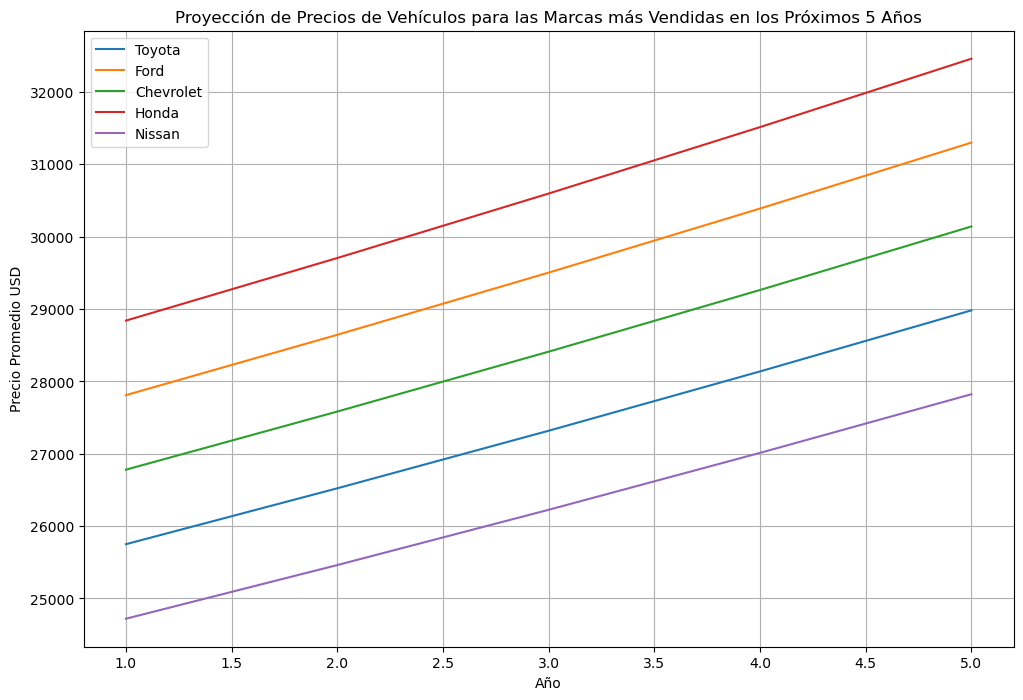

In [19]:
annual_price_growth = 0.03

# Precios promedio de los vehículos para las marcas más vendidas
average_prices = {
    'Toyota': 25000,
    'Ford': 27000,
    'Chevrolet': 26000,
    'Honda': 28000,
    'Nissan': 24000
}

# Proyección de precios para los próximos 5 años
future_price_projection = {}
for brand, price in average_prices.items():
    future_prices = [price * ((1 + annual_price_growth) ** i) for i in range(1, 6)]
    future_price_projection[brand] = future_prices

# Graficar las proyecciones de precios
plt.figure(figsize=(12, 8))
for brand, prices in future_price_projection.items():
    plt.plot(range(1, 6), prices, label=brand)

plt.title('Proyección de Precios de Vehículos para las Marcas más Vendidas en los Próximos 5 Años')
plt.xlabel('Año')
plt.ylabel('Precio Promedio USD')
plt.legend()
plt.grid(True)
plt.show()

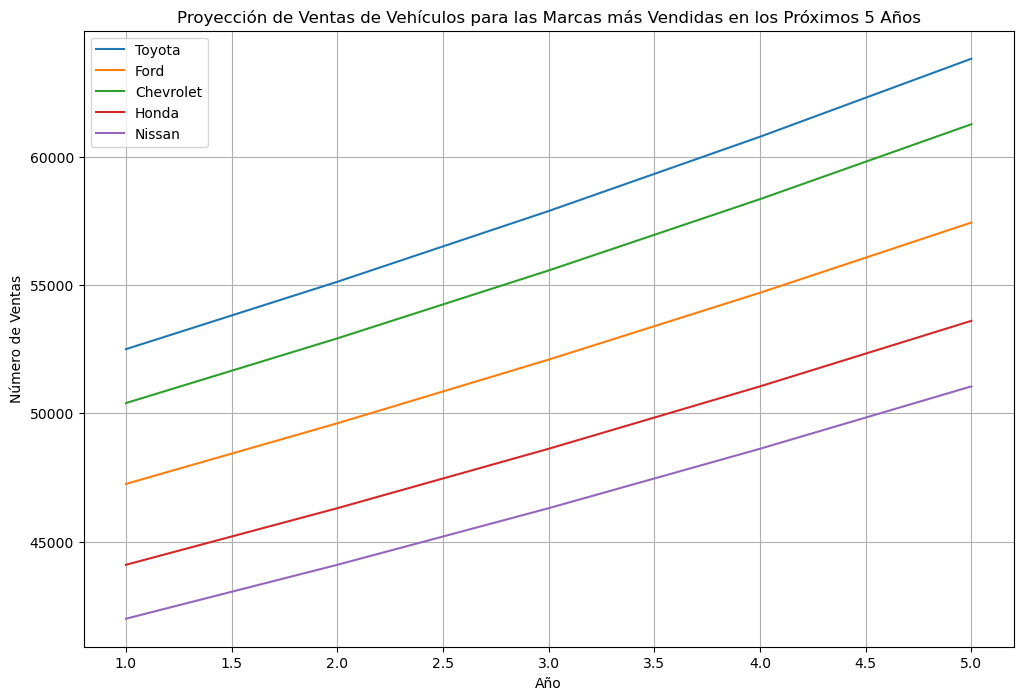

In [20]:
annual_sales_growth = 0.05

# Ventas totales por año para las marcas más vendidas
total_sales = {
    'Toyota': 50000,
    'Ford': 45000,
    'Chevrolet': 48000,
    'Honda': 42000,
    'Nissan': 40000
}

# Proyección de ventas para los próximos 5 años
future_sales_projection = {}
for brand, sales in total_sales.items():
    future_sales = [sales * ((1 + annual_sales_growth) ** i) for i in range(1, 6)]
    future_sales_projection[brand] = future_sales

# Graficar las proyecciones de ventas
plt.figure(figsize=(12, 8))
for brand, sales in future_sales_projection.items():
    plt.plot(range(1, 6), sales, label=brand)

plt.title('Proyección de Ventas de Vehículos para las Marcas más Vendidas en los Próximos 5 Años')
plt.xlabel('Año')
plt.ylabel('Número de Ventas')
plt.legend()
plt.grid(True)
plt.show()